## Observations and Insights 

In [105]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [89]:
# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")

In [106]:
#Sort by Mouse ID and Timepoint
merged_df = merged_df.sort_values(["Mouse ID", "Timepoint"])
merged_df.drop_duplicates() 
#merged_df = merged_df.drop_duplicates(subset=["Mouse ID, "Timepoint"])#I don't know how to drop duplicates from mouse id and timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [74]:
# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
594,b447,Ceftamin,Male,2,30,0,45.0,0
752,d133,Zoniferol,Male,5,30,0,45.0,0
851,f932,Ketapril,Male,15,29,0,45.0,0
938,h428,Ketapril,Female,1,27,0,45.0,0
1163,l872,Placebo,Male,19,30,0,45.0,0
1216,n482,Propriva,Female,4,29,0,45.0,0
1315,o848,Stelasyn,Female,14,27,0,45.0,0
1551,t573,Ceftamin,Female,15,27,0,45.0,0
1583,u153,Ceftamin,Female,11,25,0,45.0,0
1599,v199,Naftisol,Female,17,29,0,45.0,0


In [67]:
# Checking the number of mice.
mouse_count= merged_df["Mouse ID"].count()
mouse_count

12

In [48]:
#Sort by Mouse ID
merged_df = merged_df


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID.
get_dup_mice_data = merged_df[merged_df.duplicated(['Mouse ID'])]
get_dup_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dup_mice_df = merged_df.drop_duplicates("Mouse ID")
clean_dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [8]:
# Checking the number of mice in the clean DataFrame. I don't think I need this because it states it up above that there are 249 rows
clean_df = clean_dup_mice_df["Mouse ID"].count()
clean_df

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#is there any way to use describe with groupby?

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

#calculate mean on column Drug Regimen grouped by drug
mean = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

#calculate median on column Drug Regimen grouped by drug
median =  merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

#calculate variance on column Drug Regimen grouped by drug
variance = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

#calculate standard deviation on column Drug Regimen grouped by drug
standard_dv = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

#calculate SEM of the tumor volum on column Drug Regimen grouped by drug; Return unbiased standard error of the mean over requested axis.
sem = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
#create summary frame of data to display calculations created above; this feel like the same ask as below



In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [15]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
clean_df = pd.DataFrame(merged_df.groupby(["Drug Regimen"]).count()).reset_index()
regimen = clean_df["Drug Regimen"]
#renaming it more cohesive and eliminating extra columns
mice_tested = clean_df[["Drug Regimen", "Mouse ID"]]
mice_tested = mice_tested.set_index("Drug Regimen")

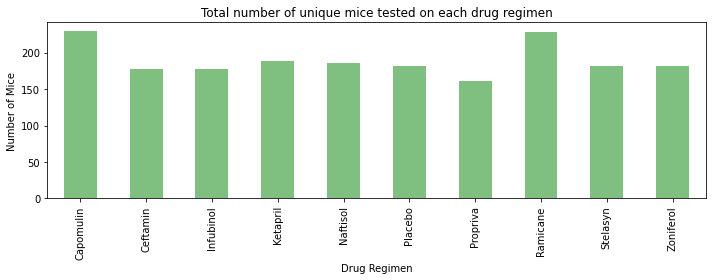

In [16]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
#create chart and set x & y label size
x_axis = np.arange(len(mice_tested))
mice_tested['Mouse ID'].plot(kind="bar", figsize=(10,4), color="green", alpha=0.5,\
                            title=("Total number of unique mice tested on each drug regimen"))

#set the labels
plt.xlabel("Drug Regimen", fontsize = 10)
plt.ylabel("Number of Mice", fontsize = 10)
plt.tight_layout()
plt.show()

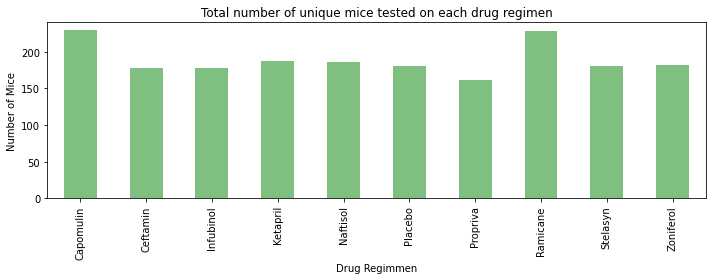

In [20]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.figure(figsize=(10,4))
#use x_axis from above
plt.bar(x_axis, mice_tested["Mouse ID"], color='g', alpha=0.5, align='center', width=0.5)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, mice_tested.index, rotation='vertical')
plt.xlim(-0.5, len(x_axis)-0.5)
plt.ylim(0, max(mice_tested["Mouse ID"]+10))

#set title, axis labels and layout
plt.title("Total number of unique mice tested on each drug regimen", fontsize = 12)
plt.xlabel("Drug Regimmen", fontsize =10)
plt.ylabel("Number of Mice", fontsize = 10)
plt.tight_layout()
plt.show()

Text(0, 0.5, '')

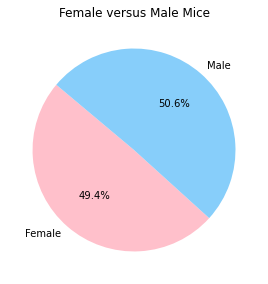

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
bygender = merged_df.groupby("Sex").count().reset_index()
bygender
#clean the data to include only Sex and Mouse ID columns
bygender = bygender[["Sex", "Mouse ID"]]
plt.figure(figsize=(10,10))
ax = plt.subplot(121, aspect="equal")
# Set colors
colors = ["pink", "lightskyblue"]
bygender.plot(kind="pie", y = "Mouse ID", title="Female versus Male Mice", ax=ax,\
              autopct='%1.1f%%',labels=bygender["Sex"],\
              legend = False, fontsize=10, colors=colors, startangle=140)
#null out the y label
plt.ylabel("")

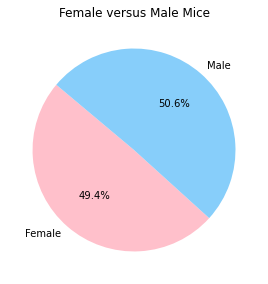

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Set Colors
colors = ["pink", "lightskyblue"]
#Set size
plt.figure(figsize=(10,10))
plt.subplot(121, aspect="equal")
#Assign labels
plt.pie(bygender["Mouse ID"], labels=bygender["Sex"], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Female versus Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [108]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
best_regimes = merged_df[merged_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_regimes = best_regimes.sort_values(["Timepoint"], ascending=True)
best_regimes

# Capomulin, Ramicane, Infubinol, and Ceftamin
best_regimes_data = best_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
best_regimes_data
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
454,Infubinol,a203,0,45.000000
290,Capomulin,b742,0,45.000000
1637,Infubinol,v766,0,45.000000
411,Ramicane,q597,0,45.000000
595,Ceftamin,b487,0,45.000000
...,...,...,...,...
234,Ramicane,r811,45,37.225650
800,Infubinol,e476,45,62.435404
1773,Ceftamin,x581,45,64.634949
144,Capomulin,m957,45,33.329098


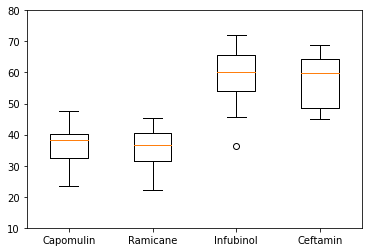

In [120]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
#Group data by Drug Regimen and Mouse ID to capture Last Tumor Measurement
best_regimens_sort = best_regimes_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
best_regimens_sort.head()

# Turn retrieved data into dataframe to easily manipulate
best_regimen_df = best_regimens_sort.to_frame()
best_regimen_df

#Create a list to use as labels and dataframe
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_df = best_regimen_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.show()

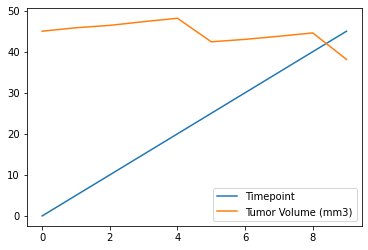

In [121]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

time_vs_tumor = merged_df[merged_df["Mouse ID"].isin(["j119"])]
time_vs_tumor

time_vs_tumor_data = time_vs_tumor[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_vs_tumor_data

line_plot_df = time_vs_tumor_data.reset_index()
line_plot_df

line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_final

lines = line_plot_final.plot.line()

## Line and Scatter Plots

In [124]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumorvolume_list = line_plot_final['Tumor Volume (mm3)'].tolist()
timepoint_list = line_plot_final['Timepoint'].tolist()

In [125]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_scatter = merged_df[merged_df["Drug Regimen"].isin(["Capomulin"])]
capomulin_scatter_df = best_regimes[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]
capomulin_sorted_plot = capomulin_scatter_plot.sort_values(["Weight (g)"], ascending=True)
capomulin_scatter_plot = capomulin_scatter.reset_index()
capomulin_grouped_weight = capomulin_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
capo_grouped_plot = pd.DataFrame(capomulin_grouped_weight).reset_index()

#capomulin_scatter = capomulin_grouped_weight.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')
capomulin_scatter = capo_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))
#capomulin_scatter

NameError: name 'capomulin_scatter_plot' is not defined

## Correlation and Regression

In [119]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capo_grouped_plot["Weight (g)"]
y_values = capo_grouped_plot["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Vs. Avg Tumor Vol")
plt.show()



NameError: name 'capo_grouped_plot' is not defined

In [118]:
#The executive team also has asked for a top-level summary of the study results.

In [ ]:
Observations and Insights
1. The bar graph showed the Drug Regimen Capomulin has the maximum mice number (230), and Zoniferol has the smaller mice number (182).By removing duplicates the total number of mice is 248. The total count of mice by gender also showed that 124 female mice and 125 male mice.
2. The correlation between mouse weight, and average tumor volume is 0.84. It is a strong positive correlation, when the mouse weight increases the average tumor volume also increases.
3. The regression analysis helped us to understand how much the average tumor volume (dependent variable) will change when weight of mice change(independent variables). The R-squared value is 0.70, which means 70% the model fit the data, wich is fairely good to predict the data from the model. Higher R-squared values represent smaller differences between the observed data, and the fitted value. 70% the model explains all of the variation in the response variable around its mean.
4. From the selected treatments Capomulin and Ramicane reduces the size of tumors better.